In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("Datasets/HIPPA-Dataset.csv")
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,Theft,Paper/Films,No
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,Theft,Network Server,No
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,Theft,"Other, Other Portable Electronic Device",No
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,Loss,Laptop,No
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,Theft,Desktop Computer,No


In [3]:
# This cell will focus on the 'Name of Covered Entity' Column
# df.head(10)
CoveredEntityColumn = df.loc[:, 'Name of Covered Entity']
# print(str(CoveredEntityColumn.values))
counter = 0
for i in range(0, len(CoveredEntityColumn.values)):
    CoveredEntityColumn[i] = counter
    counter += 1
df.head(10)

<ipython-input-3-d5c81f86e784>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoveredEntityColumn[i] = counter


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0,TX,Healthcare Provider,1000.0,Theft,Paper/Films,No
1,1,MO,Healthcare Provider,1000.0,Theft,Network Server,No
2,2,AK,Healthcare Provider,501.0,Theft,"Other, Other Portable Electronic Device",No
3,3,DC,Health Plan,3800.0,Loss,Laptop,No
4,4,CA,Healthcare Provider,5166.0,Theft,Desktop Computer,No
5,5,CA,Healthcare Provider,5257.0,Theft,Desktop Computer,No
6,6,CA,Healthcare Provider,857.0,Theft,Desktop Computer,No
7,7,CA,Healthcare Provider,6145.0,Theft,Desktop Computer,No
8,8,CA,Healthcare Provider,952.0,Theft,Desktop Computer,No
9,9,CA,Healthcare Provider,5900.0,Theft,Laptop,No


In [4]:
# This cell will focus on the 'State' Column
# df.State.unique()
df.State = df.State.replace({
    'TX': 0, 
    'MO': 1, 
    'AK': 2, 
    'DC': 3, 
    'CA': 4, 
    'PA': 5, 
    'TN': 6, 
    'VA': 7, 
    'NC': 8, 
    'MI': 9, 
    'MA': 10,
    'MD': 11, 
    'ID': 12, 
    'IL': 13, 
    'UT': 14, 
    'AZ': 15, 
    'RI': 16, 
    'PR': 17, 
    'FL': 18, 
    'NM': 19, 
    'NY': 20, 
    'WY': 21,
    'WI': 22, 
    'WA': 23, 
    'CT': 24, 
    'AL': 25, 
    'GA': 26, 
    'SC': 27, 
    'KY': 28, 
    'MN': 29, 
    'CO': 30, 
    'NE': 31, 
    'KS': 32,
    'OH': 33, 
    'NV': 34, 
    'IN': 35, 
    'OR': 36, 
    'IA': 37, 
    'OK': 38, 
    'AR': 39, 
    'MS': 40, 
    'NH': 41, 
    'MT': 42,
    'NJ': 43, 
    'WV': 44, 
    'LA': 45, 
    'ND': 46, 
    'HI': 47, 
    'SD': 48, 
    'ME': 49, 
    'VT': 50, 
    'DE': 51
})
df.head(10)

# Double back in this cell to figure out how to handle the nan columns

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0,0.0,Healthcare Provider,1000.0,Theft,Paper/Films,No
1,1,1.0,Healthcare Provider,1000.0,Theft,Network Server,No
2,2,2.0,Healthcare Provider,501.0,Theft,"Other, Other Portable Electronic Device",No
3,3,3.0,Health Plan,3800.0,Loss,Laptop,No
4,4,4.0,Healthcare Provider,5166.0,Theft,Desktop Computer,No
5,5,4.0,Healthcare Provider,5257.0,Theft,Desktop Computer,No
6,6,4.0,Healthcare Provider,857.0,Theft,Desktop Computer,No
7,7,4.0,Healthcare Provider,6145.0,Theft,Desktop Computer,No
8,8,4.0,Healthcare Provider,952.0,Theft,Desktop Computer,No
9,9,4.0,Healthcare Provider,5900.0,Theft,Laptop,No


In [5]:
# df['Covered Entity Type'].unique()
df['Covered Entity Type'] = df['Covered Entity Type'].replace({
    'Healthcare Provider': 0,
    'Health Plan': 1, 
    'Business Associate': 2,
    'Healthcare Clearing House': 3
})
df.head(10)

# Double back with this cell to investigate the name cells as that is going to play a key role in getting an accurate reading

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0,0.0,0.0,1000.0,Theft,Paper/Films,No
1,1,1.0,0.0,1000.0,Theft,Network Server,No
2,2,2.0,0.0,501.0,Theft,"Other, Other Portable Electronic Device",No
3,3,3.0,1.0,3800.0,Loss,Laptop,No
4,4,4.0,0.0,5166.0,Theft,Desktop Computer,No
5,5,4.0,0.0,5257.0,Theft,Desktop Computer,No
6,6,4.0,0.0,857.0,Theft,Desktop Computer,No
7,7,4.0,0.0,6145.0,Theft,Desktop Computer,No
8,8,4.0,0.0,952.0,Theft,Desktop Computer,No
9,9,4.0,0.0,5900.0,Theft,Laptop,No


In [6]:
# df['Type of Breach'].unique()
df['Type of Breach'] = df['Type of Breach'].replace({
    'Theft': 0, 
    'Loss': 1, 
    'Other': 2, 
    'Hacking/IT Incident': 3,
    'Loss, Theft': 4, 
    'Improper Disposal': 5, 
    'Improper Disposal, Loss': 6,
    'Other, Theft': 7, 
    'Loss, Other': 8, 
    'Unauthorized Access/Disclosure': 9,
    'Improper Disposal, Loss, Theft': 10, 
    'Unknown': 11,
    'Theft, Unauthorized Access/Disclosure': 12,
    'Hacking/IT Incident, Unauthorized Access/Disclosure': 13,
    'Other, Unauthorized Access/Disclosure': 14,
    'Hacking/IT Incident, Other': 15, 
    'Other, Unknown': 16,
    'Loss, Unauthorized Access/Disclosure, Unknown': 17,
    'Hacking/IT Incident, Other, Unauthorized Access/Disclosure': 18,
    'Hacking/IT Incident, Theft, Unauthorized Access/Disclosure': 19,
    'Improper Disposal, Theft': 20, 
    'Hacking/IT Incident, Theft': 21,
    'Loss, Other, Theft': 22,
    'Other, Theft, Unauthorized Access/Disclosure': 23,
    'Improper Disposal, Theft, Unauthorized Access/Disclosure': 24,
    'Loss, Unknown': 25, 
    'Loss, Unauthorized Access/Disclosure': 26,
    'Improper Disposal, Unauthorized Access/Disclosure': 27
})
df.head(10)

# Before completing covariance analysis figure out how to handle nan data

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0,0.0,0.0,1000.0,0.0,Paper/Films,No
1,1,1.0,0.0,1000.0,0.0,Network Server,No
2,2,2.0,0.0,501.0,0.0,"Other, Other Portable Electronic Device",No
3,3,3.0,1.0,3800.0,1.0,Laptop,No
4,4,4.0,0.0,5166.0,0.0,Desktop Computer,No
5,5,4.0,0.0,5257.0,0.0,Desktop Computer,No
6,6,4.0,0.0,857.0,0.0,Desktop Computer,No
7,7,4.0,0.0,6145.0,0.0,Desktop Computer,No
8,8,4.0,0.0,952.0,0.0,Desktop Computer,No
9,9,4.0,0.0,5900.0,0.0,Laptop,No


In [7]:
# This cell will focus the 'Location of Breached Information' column
df['Location of Breached Information'].unique()
df['Location of Breached Information'] = df['Location of Breached Information'].replace({
    'Paper/Films': 0, 
    'Network Server': 1,
    'Other, Other Portable Electronic Device': 2, 
    'Laptop': 3,
    'Desktop Computer': 4, 
    'Other': 5,
    'Desktop Computer, Electronic Medical Record, Network Server': 6,
    'Desktop Computer, Laptop': 7, 
    'Other Portable Electronic Device': 8,
    'Email': 9,
    'Electronic Medical Record, Other, Other Portable Electronic Device': 10,
    'Other, Paper/Films': 11, 
    'Email, Other Portable Electronic Device': 12,
    'Desktop Computer, Email, Laptop, Network Server': 13,
    'Desktop Computer, Paper/Films': 14,
    'Desktop Computer, Laptop, Other, Other Portable Electronic Device': 15,
    'Electronic Medical Record': 16, 
    'Laptop, Paper/Films': 17,
    'Laptop, Network Server': 18, 
    'Desktop Computer, Network Server': 19,
    'Email, Network Server': 20, 
    'Electronic Medical Record, Other': 21,
    'Desktop Computer, Other, Other Portable Electronic Device': 22,
    'Desktop Computer, Network Server, Other, Other Portable Electronic Device': 23,
    'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device': 24,
    'Laptop, Other Portable Electronic Device, Paper/Films': 25,
    'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films': 26,
    'Desktop Computer, Other': 27, 
    'Electronic Medical Record, Laptop': 28,
    'Electronic Medical Record, Paper/Films': 29,
    'Laptop, Other Portable Electronic Device': 30,
    'Desktop Computer, Electronic Medical Record': 31,
    'Desktop Computer, Other Portable Electronic Device': 32,
    'Email, Other': 33, 
    'Network Server, Paper/Films': 34,
    'Network Server, Other': 35,
    'Desktop Computer, Electronic Medical Record, Email, Network Server, Paper/Films': 36,
    'Desktop Computer, Other, Other Portable Electronic Device, Paper/Films': 37,
    'Desktop Computer, Email': 38, 
    'Email, Laptop, Network Server': 39,
    'Email, Laptop, Other Portable Electronic Device': 40,
    'Desktop Computer, Laptop, Other Portable Electronic Device': 41,
    'Email, Laptop': 42, 
    'Electronic Medical Record, Network Server': 43,
    'Desktop Computer, Network Server, Paper/Films': 44,
    'Desktop Computer, Email, Laptop, Network Server, Other, Other Portable Electronic Device': 45,
    'Laptop, Other': 46, 
    'Desktop Computer, Laptop, Network Server': 47,
    'Other Portable Electronic Device, Paper/Films': 48,
    'Desktop Computer, Electronic Medical Record, Laptop': 49,
    'Desktop Computer, Electronic Medical Record, Email, Network Server': 50,
    'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other Portable Electronic Device': 51,
    'Email, Network Server, Other Portable Electronic Device': 52,
    'Desktop Computer, Laptop, Paper/Films': 53,
    'Desktop Computer, Other Portable Electronic Device, Paper/Films': 54,
    'Electronic Medical Record, Laptop, Network Server, Other, Other Portable Electronic Device': 55,
    'Email, Laptop, Paper/Films': 56,
    'Desktop Computer, Laptop, Network Server, Other Portable Electronic Device': 57,
    'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server': 58,
    'Desktop Computer, Electronic Medical Record, Other': 59,
    'Desktop Computer, Email, Network Server': 60,
    'Electronic Medical Record, Email, Laptop, Paper/Films': 61,
    'Desktop Computer, Electronic Medical Record, Email, Laptop, Other, Other Portable Electronic Device, Paper/Films': 62
})
df.head(10)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0,0.0,0.0,1000.0,0.0,0.0,No
1,1,1.0,0.0,1000.0,0.0,1.0,No
2,2,2.0,0.0,501.0,0.0,2.0,No
3,3,3.0,1.0,3800.0,1.0,3.0,No
4,4,4.0,0.0,5166.0,0.0,4.0,No
5,5,4.0,0.0,5257.0,0.0,4.0,No
6,6,4.0,0.0,857.0,0.0,4.0,No
7,7,4.0,0.0,6145.0,0.0,4.0,No
8,8,4.0,0.0,952.0,0.0,4.0,No
9,9,4.0,0.0,5900.0,0.0,3.0,No


In [8]:
# This cell will focus on the 'Business Associate Present' column
df['Business Associate Present'].unique()
df['Business Associate Present'] = df['Business Associate Present'].map({
    'No': 0,
    'Yes': 1
}.get)
df.tail()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
1716,1716,25.0,0.0,4300.0,3.0,1.0,0
1717,1717,25.0,0.0,4300.0,3.0,1.0,0
1718,1718,0.0,1.0,1842.0,5.0,0.0,0
1719,1719,18.0,0.0,531.0,1.0,8.0,0
1720,1720,18.0,1.0,1214.0,9.0,0.0,0


In [10]:
df['Individuals Affected'].min()

500.0

In [12]:
df['Individuals Affected'].max()

78800000.0

In [14]:
df['Individuals Affected'] = df['Individuals Affected'].apply(lambda v: ((v-df['Individuals Affected'].min())/(df['Individuals Affected'].max()-df['Individuals Affected'].min())))
df.head(10)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,0,0.0,0.0,6.345218e-06,0.0,0.0,0
1,1,1.0,0.0,6.345218e-06,0.0,1.0,0
2,2,2.0,0.0,1.269044e-08,0.0,2.0,0
3,3,3.0,1.0,4.187844e-05,1.0,3.0,0
4,4,4.0,0.0,5.921357e-05,0.0,4.0,0
5,5,4.0,0.0,6.036840e-05,0.0,4.0,0
6,6,4.0,0.0,4.530486e-06,0.0,4.0,0
7,7,4.0,0.0,7.163751e-05,0.0,4.0,0
8,8,4.0,0.0,5.736077e-06,0.0,4.0,0
9,9,4.0,0.0,6.852835e-05,0.0,3.0,0


In [16]:
df.cov()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
State,162.154152,-0.002287,0.011086,2.594671,3.945805,-0.090951
Covered Entity Type,-0.002287,0.592424,0.000669,0.353728,-0.787924,0.252097
Individuals Affected,0.011086,0.000669,0.000634,-0.000774,-0.002419,-0.000021
Type of Breach,2.594671,0.353728,-0.000774,19.123342,2.222602,0.113427
Location of Breached Information,3.945805,-0.787924,-0.002419,2.222602,79.768532,-0.304210
Business Associate Present,-0.090951,0.252097,-0.000021,0.113427,-0.304210,0.145147


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

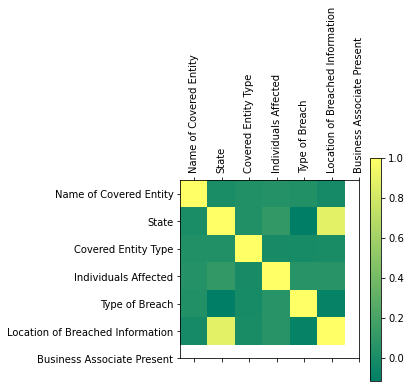

In [18]:
# matshow == matrix show
plt.matshow(df.corr(), cmap="summer")
plt.colorbar()

plt.xticks(list(range(len(df.columns))), df.columns, rotation='vertical')
plt.yticks(list(range(len(df.columns))), df.columns, rotation='horizontal')
# This is a simple correlation analysis -- I plan to grow into a larger set w/more data to see how all the attributes truly do correlate
plt.show()

In [19]:
df.to_csv("Datasets/Preprocessed-Datasets/preprocessed-HIPPA-Dataset.csv", index=False)